Chaque projet d'apprentissage automatique implique de comprendre les données et l'objectif que vous essayez d'atteindre. Il y a 7 étapes que vous devez connaître si vous souhaitez créer et construire un projet d'apprentissage automatique bien défini :
1. Comprendre le problème
2. Choisir une donnée appropriée
3. Préparation des données
4. Quelques visualisations
5. Choisir le bon algorithme
6. Modélisation
7. Expérimentation

# Understanding the Problem

Le but de mon projet est de prédire le Prix des logements en Californie.Pour cela, nous avons recensé les données en californie dans le but de faire des prédictions sur le prix des appartements.
Les données contiennent la variable median_house_value qui est une donnée continue et nous renseigne sur le prix médian de l'immobilier en Californie. Notre objectif ici est de prédire la median_house_value d'une maison en Californie, compte tenu d'un certain nombre d'autres attributs de cette maison.

# Data Preparation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold

In [3]:
df=pd.read_csv('C:/Users/DELL/Desktop/GOMYCODE/housing.csv')

In [4]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

Description de chaque attribut

longitude : mesure de la distance à l'ouest d'une maison ; une valeur plus élevée est plus à l'ouest

latitude : mesure de la distance au nord d'une maison ; une valeur plus élevée est plus au nord

housingMedianAge : âge médian d'une maison dans un bloc ; un nombre inférieur est un bâtiment plus récent

totalRooms : nombre total de chambres dans un bloc

totalBedrooms : nombre total de chambres dans un bloc

population : nombre total de personnes résidant dans un bloc

ménages : nombre total de ménages, un groupe de personnes résidant dans une unité d'habitation, pour un bloc

medianIncome : revenu médian des ménages dans un bloc de maisons (mesuré en dizaines de milliers de dollars américains)

medianHouseValue : valeur médiane des maisons pour les ménages d'un bloc (mesurée en dollars américains)

oceanProximité : Localisation de la maison par rapport à l'océan/la mer

# Preprocessing and Data Visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.total_rooms.fillna(df.total_rooms.mean(),inplace=True)

In [7]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

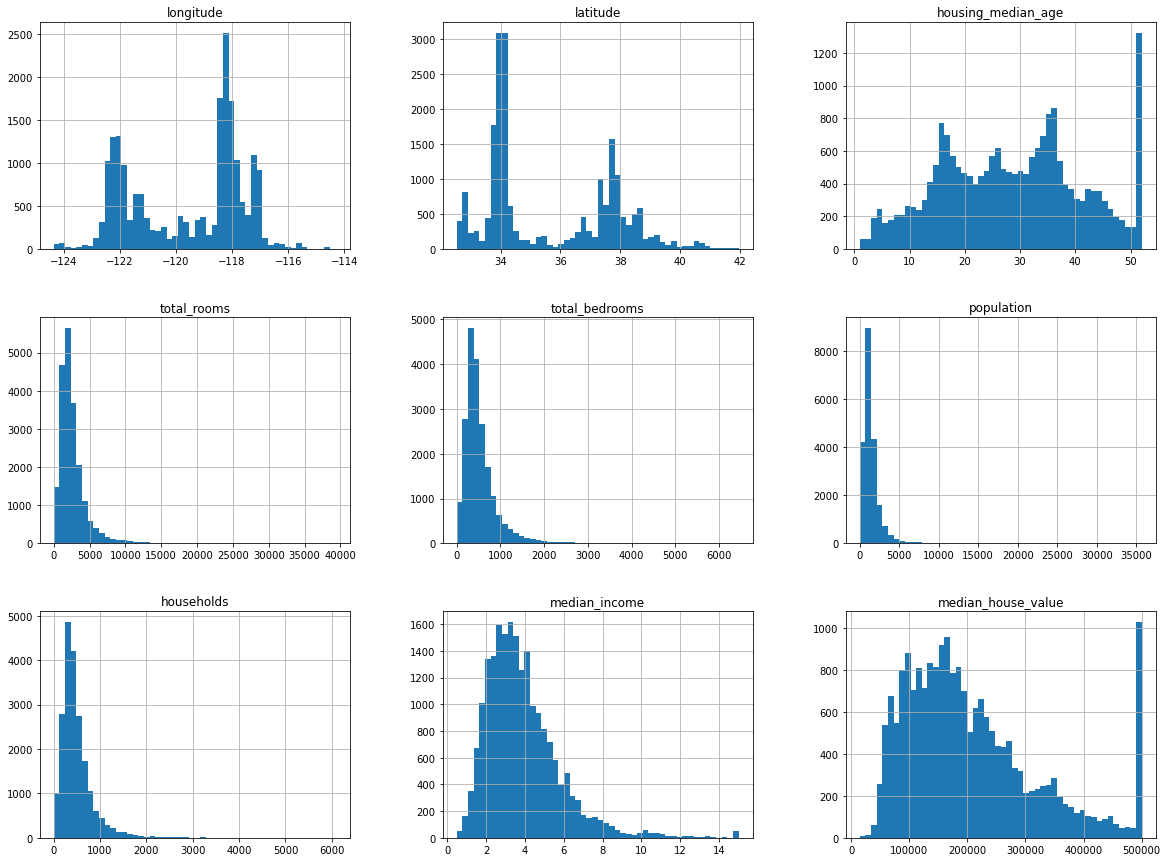

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [11]:
df['total_bedrooms'].fillna(df.total_bedrooms.mean(),inplace=True)

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<AxesSubplot:ylabel='ocean_proximity'>

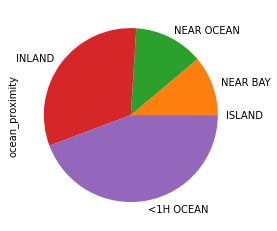

In [12]:
display(df['ocean_proximity'].value_counts())
df['ocean_proximity'].value_counts(sort=True, ascending=True).plot(kind='pie')

À partir de l'histogramme ci-dessus, regardons notre distribution de données

Nous avons pas mal de distributions de données asymétriques (moins centralisées).
"median_house_value" a un pic impair à sa valeur maximale (environ 500k), ce qui pourrait être une valeur aberrante.
"housing_median_age" ayant beaucoup de pics locaux mais un pic vraiment étrange à la valeur maximale se démarque (housing_median_age = 50). Les maisons d'un certain âge médian ne sont pas présentes dans les données.
"total_rooms", "total_bedrooms", "population", "household" ont une distribution similaire qui est biaisée vers des valeurs plus petites.

# Correlation

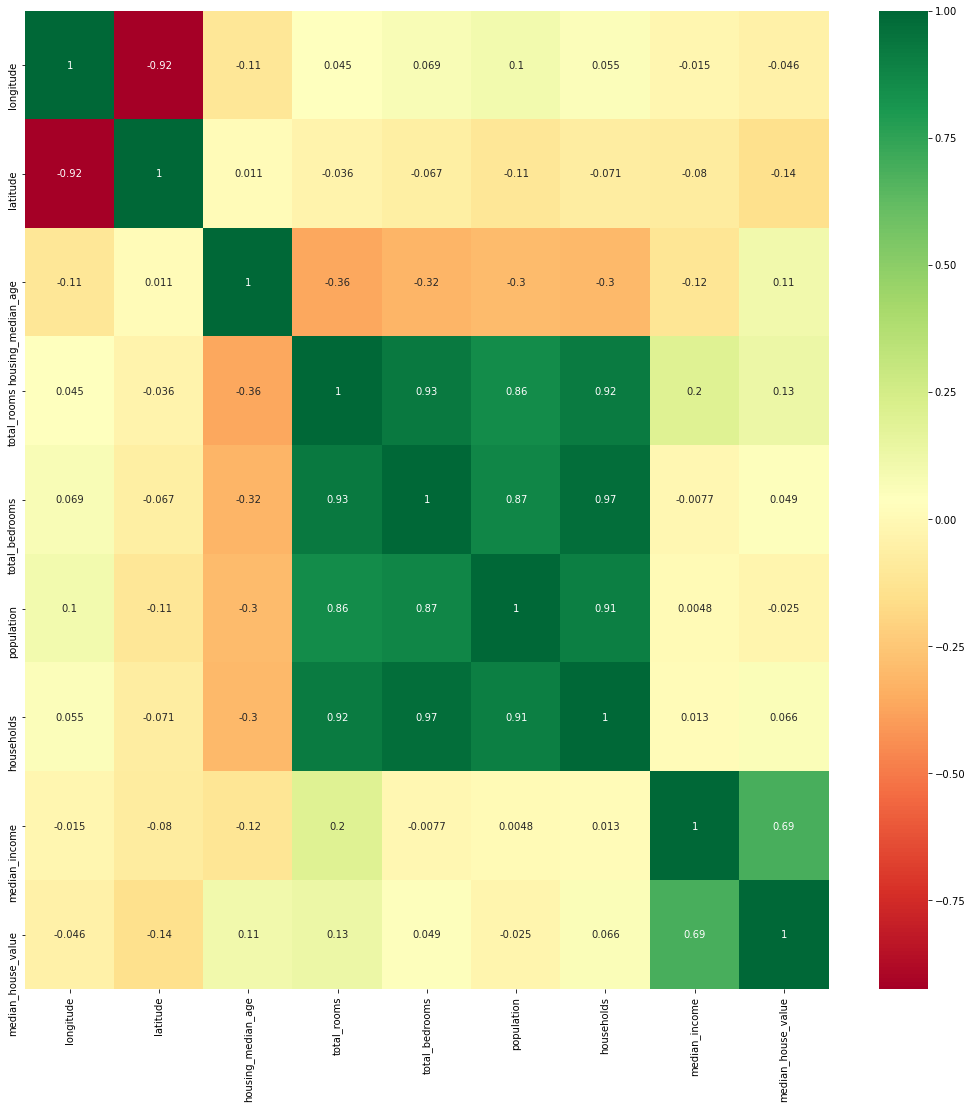

In [13]:
# Finds correlation between Independent and dependent attributes
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

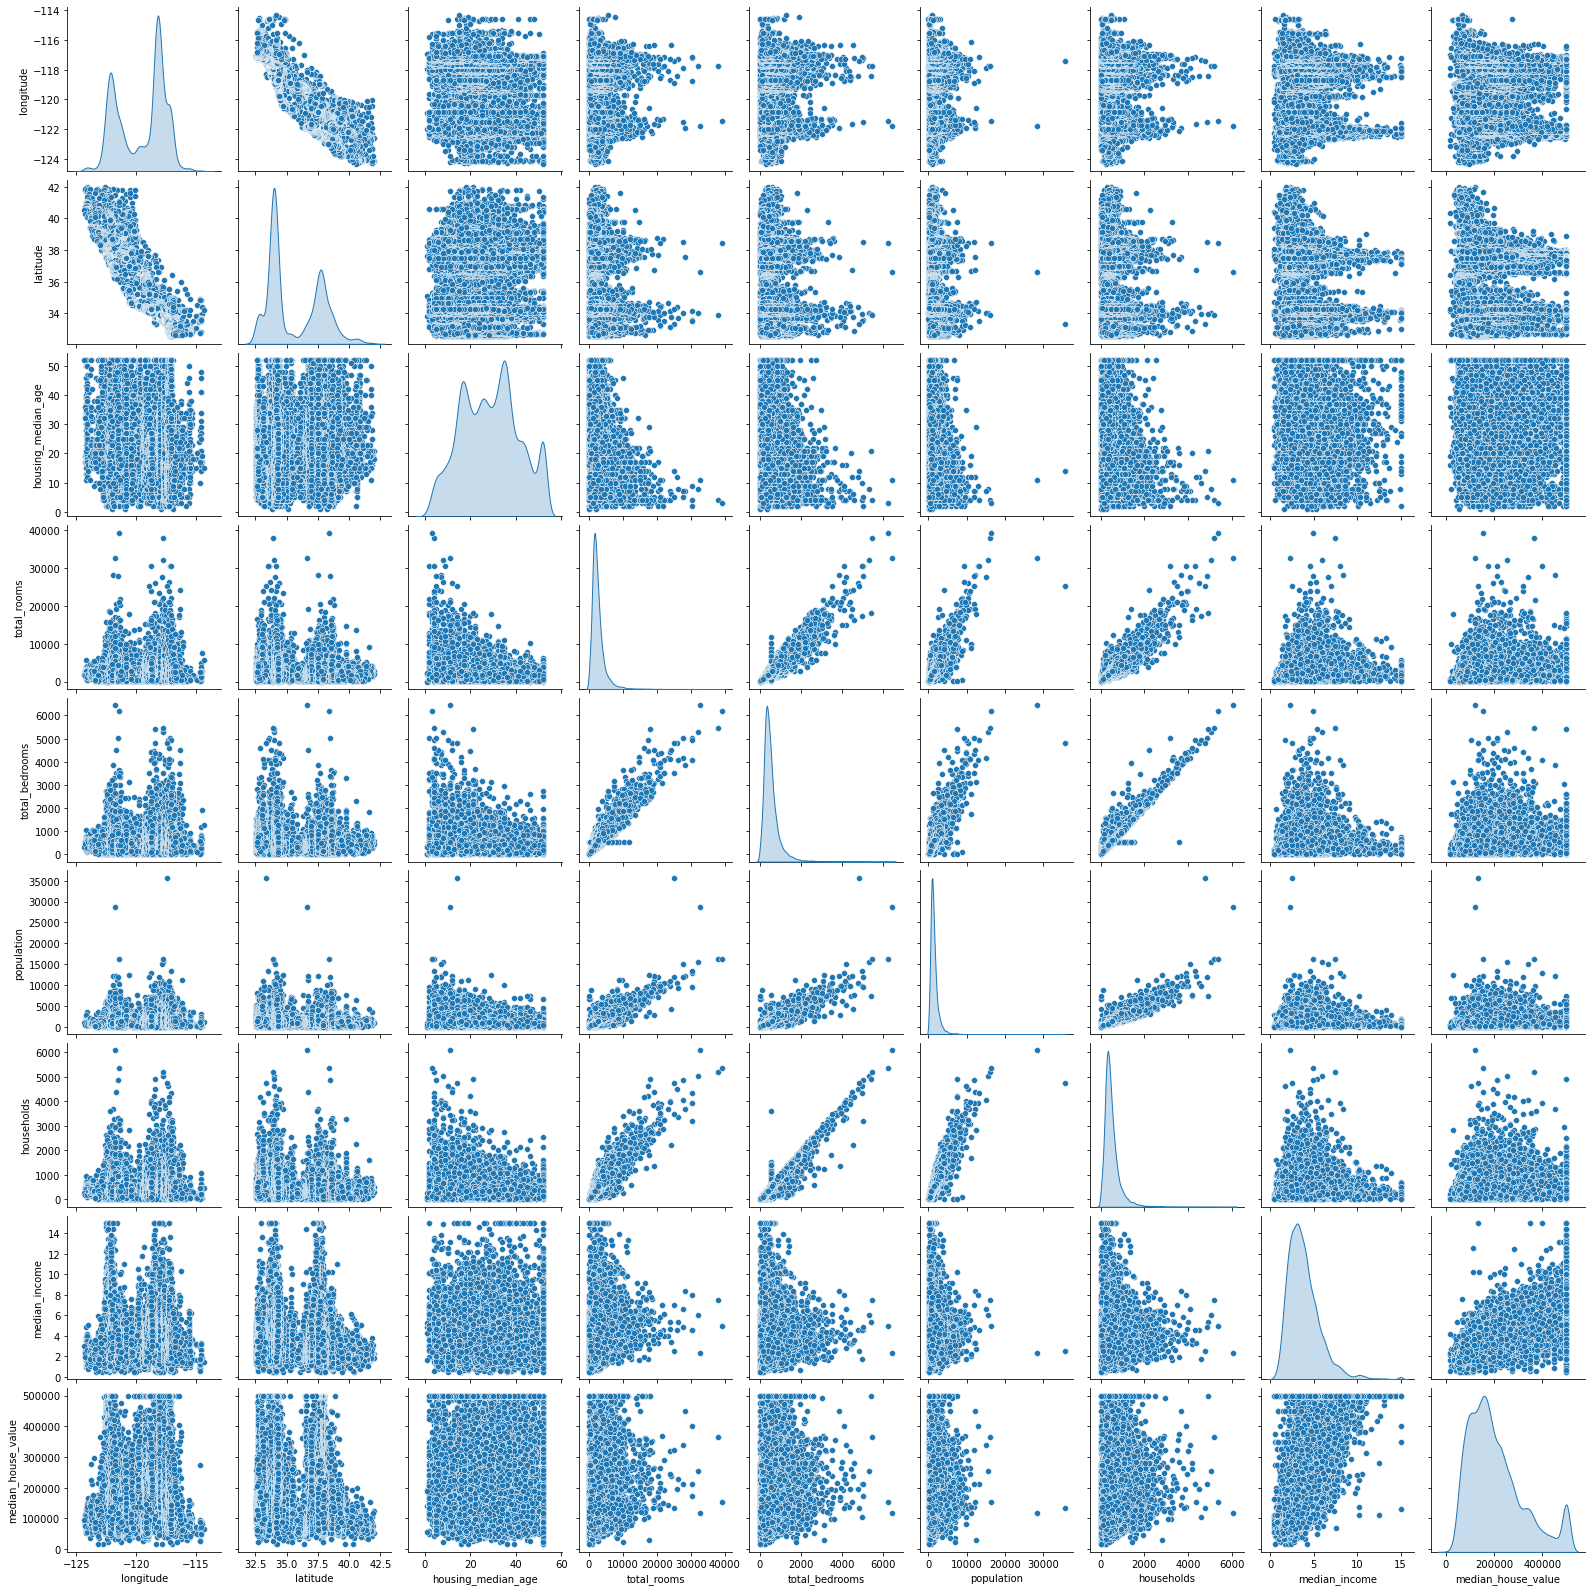

In [14]:
#pairplots to get an intuition of potential correlations 
sns.pairplot(df, diag_kind="kde")

À partir de la carte thermique et du diagramme de paires ci-dessus :

Le diagramme de paires donne un bref aperçu du comportement de chaque variable par rapport à toutes les autres variables. Par exemple, la colonne "median_house_value" (notre variable cible) est négativement corrélée avec la "longitude", la "latitude" et les caractéristiques de la population.
Les caractéristiques ont des échelles d'axe assez différentes, donc la mise à l'échelle doit certainement être prise en compte.
La relation entre "median_house_value", "median_ income" est presque linéaire
La relation "houseing_median_age" vs "median_house_value" montre que les données sont complètement dispersées partout

# Correlation Matrix

In [15]:
corr_matrix = df.corr()
corr_matrix
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

D'en haut, nous pouvons voir que "median_house_value" est fortement corrélé à "median_ income". Cela signifie que "median_ income" est une caractéristique importante pour prédire "median_house_value".

<AxesSubplot:title={'center':'Visualizing Geographical Data'}, xlabel='longitude', ylabel='latitude'>

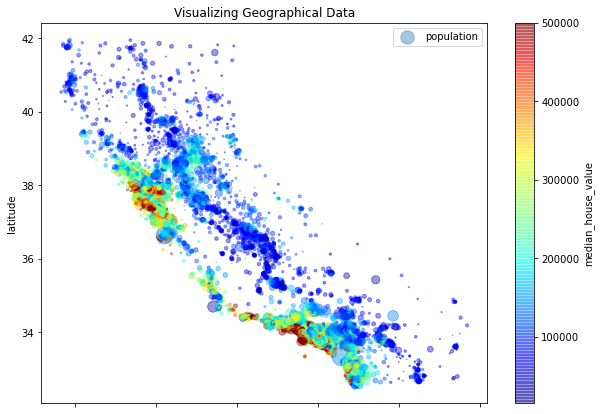

In [16]:
# Visualizing Geographical Data
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
            s=df['population']/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap('jet'), colorbar=True, title="Visualizing Geographical Data")

Ci-dessus, la visualisation des données géographiques : le rayon de la bulle représente la population du district et la couleur de la bulle indique la valeur médiane de la maison. ex : les bulles de couleur rouge indiquent les quartiers avec des maisons chères.

<AxesSubplot:title={'center':'median_house_value vs ocean_proximity'}, xlabel='ocean_proximity', ylabel='median_house_value'>

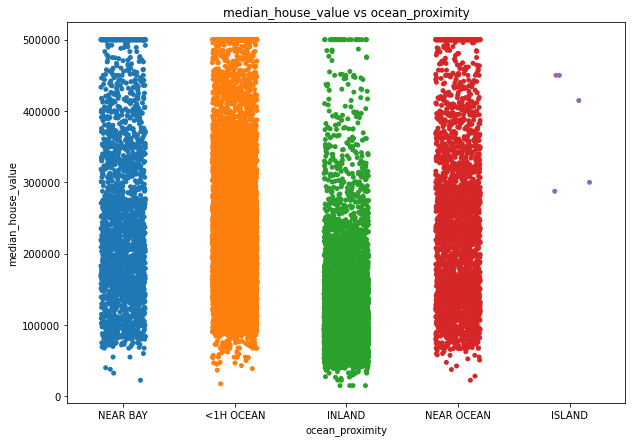

In [17]:
plt.figure(figsize=(10,7))
plt.title("median_house_value vs ocean_proximity")
sns.stripplot(data=df,x='ocean_proximity',y='median_house_value',jitter=0.2)

D'après le graphique ci-dessus, nous pouvons voir que les maisons les plus chères disponibles dans la classe "<1H OCEAN" et "ISLAND" ont un nombre très inférieur de maisons

# Experimenting with Attribute Combinations

In [18]:
# Testing new variables by checking their correlation w.r.t. "median_house_value"
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]
df['income per working population']=df['households']-df['population']

corr_matrix = df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value               1.000000
median_income                    0.688075
rooms_per_household              0.151948
total_rooms                      0.134153
housing_median_age               0.105623
income per working population    0.066204
households                       0.065843
total_bedrooms                   0.049454
population_per_household        -0.023737
population                      -0.024650
longitude                       -0.045967
latitude                        -0.144160
bedrooms_per_room               -0.220049
Name: median_house_value, dtype: float64

# Train Test Split

Le pourcentage de distribution de l'échantillon "ocean_proximity" est différent dans l'ensemble de données. Pour éviter les biais lors de la division de l'ensemble de données pour former l'ensemble de données et tester l'ensemble de données, nous pouvons utiliser "StratifiedShuffleSplit"

In [19]:
# spliting the dataset to train dataset and test dataset
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["ocean_proximity"]):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]
print(train_set.shape,test_set.shape )

(16512, 14) (4128, 14)


In [20]:
#ocean_proximity distribution in train dataset
train_set["ocean_proximity"].value_counts() / len(train_set)

<1H OCEAN     0.442648
INLAND        0.317406
NEAR OCEAN    0.128755
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64

In [21]:
#ocean_proximity distribution in test dataset
test_set["ocean_proximity"].value_counts() / len(test_set)

<1H OCEAN     0.442587
INLAND        0.317345
NEAR OCEAN    0.128876
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64

En utilisant StratifiedShuffleSplit, la proportion de distribution des échantillons "ocean_proximity" est presque égale entre l'ensemble de données d'entraînement et de test. Cela élimine toute possibilité de chevauchement des ensembles de train-test

# Prepare the Data for Machine Learning Algorithms

In [25]:
# A closer look at the median income attribute
# Create income categories
df['cat_income'] = pd.cut(df['median_income'], bins=[0.,1.5,3.0,4.5,6., np.inf],
                         labels =[1,2,3,4,5])

In [26]:
pip install plotly

In [28]:
import plotly.express as px
fig = px.histogram(df, x='cat_income', nbins=50)
fig.show()

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit

split  = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['cat_income']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [30]:
strat_test_set['cat_income'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: cat_income, dtype: float64

In [31]:
# drop cat_income
for set_ in (strat_train_set, strat_test_set):
    set_.drop('cat_income', axis=1, inplace=True)

In [32]:
# Split train data to target and labels.
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [33]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='median')

# Dropping the object attribute column to use impute
housing_num = housing.drop('ocean_proximity', axis=1)

# Impute missing values with the median
impute.fit(housing_num)

SimpleImputer(strategy='median')

In [34]:
housing_num.median().values

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11950000e+03,
        4.36000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54090000e+00,
        5.23228423e+00,  2.03188924e-01,  2.81765270e+00, -7.37000000e+02])

In [35]:
imputed_data = impute.transform(housing_num)

imputed_data_df = pd.DataFrame(imputed_data, columns=housing_num.columns)

imputed_data_df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -121.89     37.29                38.0       1568.0           351.0   
1    -121.93     37.05                14.0        679.0           108.0   
2    -117.20     32.77                31.0       1952.0           471.0   
3    -119.61     36.31                25.0       1847.0           371.0   
4    -118.59     34.23                17.0       6592.0          1525.0   

   population  households  median_income  rooms_per_household  \
0       710.0       339.0         2.7042             4.625369   
1       306.0       113.0         6.4214             6.008850   
2       936.0       462.0         2.8621             4.225108   
3      1460.0       353.0         1.8839             5.232295   
4      4459.0      1463.0         3.0347             4.505810   

   bedrooms_per_room  population_per_household  income per working population  
0           0.223852                  2.094395                         -371.0  
1           0.159057                  2.707965                         -193.0  
2           0.241291                  2.025974                         -474.0  
3           0.200866                  4.135977                        -1107.0  
4           0.231341                  3.047847                        -2996.0

In [36]:
# Confirming all missing values have been imputed.
imputed_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   longitude                      16512 non-null  float64
 1   latitude                       16512 non-null  float64
 2   housing_median_age             16512 non-null  float64
 3   total_rooms                    16512 non-null  float64
 4   total_bedrooms                 16512 non-null  float64
 5   population                     16512 non-null  float64
 6   households                     16512 non-null  float64
 7   median_income                  16512 non-null  float64
 8   rooms_per_household            16512 non-null  float64
 9   bedrooms_per_room              16512 non-null  float64
 10  population_per_household       16512 non-null  float64
 11  income per working population  16512 non-null  float64
dtypes: float64(12)
memory usage: 1.5 MB


# Categorical Feature

In [37]:
cat_housing = housing[['ocean_proximity']]
cat_housing.tail()

ocean_proximity
6563           INLAND
12053          INLAND
13908          INLAND
11159       <1H OCEAN
15775        NEAR BAY

In [38]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

encoded_housing_cat = encoder.fit_transform(cat_housing)

encoded_housing_cat

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [39]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix]/ X[:, households_ix]
        population_per_household = X[:, population_ix]/X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, 
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Scaling
pipeline_num = Pipeline([('imputer', SimpleImputer(strategy='median')),
                       ('attribs_adder', CombinedAttributesAdder()),
                       ('scaler', StandardScaler()),
                        ])
housing_num_tr = pipeline_num.fit_transform(housing_num)

In [41]:
housing_num_tr[:10]

array([[-1.15604281e+00,  7.71949616e-01,  7.43330892e-01,
        -4.93233934e-01, -4.48011516e-01, -6.36211407e-01,
        -4.20698422e-01, -6.14937444e-01, -3.12054519e-01,
         1.34431138e-01, -8.64987054e-02,  6.96520223e-01,
        -3.12054519e-01, -8.64987054e-02,  1.34431138e-01],
       [-1.17602483e+00,  6.59694795e-01, -1.16531720e+00,
        -9.08966554e-01, -1.03967373e+00, -9.98331347e-01,
        -1.02222705e+00,  1.33645936e+00,  2.17683377e-01,
        -7.86747388e-01, -3.35339129e-02,  9.21232493e-01,
         2.17683377e-01, -3.35339129e-02, -7.86747388e-01],
       [ 1.18684903e+00, -1.34218285e+00,  1.86641864e-01,
        -3.13659889e-01, -1.55832645e-01, -4.33639362e-01,
        -9.33177983e-02, -5.32045602e-01, -4.65315160e-01,
         3.82358878e-01, -9.24049941e-02,  5.66490088e-01,
        -4.65315160e-01, -9.24049941e-02,  3.82358878e-01],
       [-1.70676728e-02,  3.13575763e-01, -2.90520160e-01,
        -3.62762167e-01, -3.99315037e-01,  3.60409561

In [42]:
from sklearn.compose import ColumnTransformer

num_features = list(housing_num)
cat_features = ['ocean_proximity']

full_pipeline = ColumnTransformer([('num', pipeline_num, num_features),
                                  ('cat', OneHotEncoder(), cat_features)])

housing_prepared = full_pipeline.fit_transform(housing)

# Training and Evaluating the Model

In [43]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [44]:
from sklearn.metrics import mean_squared_error as MSE

housing_predictions = lin_reg.predict(housing_prepared)

lin_mse = MSE(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68730.07950670698

Enfin, nous avons évalué notre modèle avec un ensemble de données de test et obtenu un meilleur score r2 et une erreur quadratique moyenne. Nous avons également découvert l'importance de chaque fonctionnalité.
